# Create K-means clustering algorithm for Mechanical Properties

### Data Cleaning for JARVIS Dataset

In [1]:
import csv
import numpy as np
import pandas as pd

jarvis_data = pd.read_csv("C:/Users/monia/Downloads/all_filtered_materials.csv", delimiter=",")

n = 0
jarvis_data_lst = []
result = True

while result:
    if n <= 65:
        column_data = jarvis_data.iloc[:, n].replace("na", np.nan).dropna()  # Convert "NA" to NaN, then drop
        jarvis_data_lst.append(column_data)
        n += 1
    else:
        result = False
print(jarvis_data_lst[10])

27      0.196
28      0.039
30       0.78
35      0.372
36      0.866
        ...  
2857    2.104
2864    0.184
2873    2.101
2874    0.121
2883    0.211
Name: spillage, Length: 363, dtype: object


### Data Preprocessing for Materials Project Mechanical Properties (Elastic Modulus, Poisson Ratio, Bulk Modulus, Shear Modulus)

In [2]:
import numpy as np

X = np.loadtxt("C:/Users/monia/Downloads/mechanical_properties.csv", delimiter=",")
print(X)

[[ 1.96844977e+02 -6.40335209e+06  1.77176819e+03 -1.00013835e+00]
 [ 1.38196495e+02  1.49685986e+02  3.29935850e+02  1.02093320e-01]
 [ 2.48940448e+02  1.79960050e+02  4.35047599e+02  2.08733821e-01]
 ...
 [ 5.19396764e+07  5.94234629e+06  1.71721579e+07  4.44897109e-01]
 [ 1.66139755e+02  8.73349648e+01  2.22940408e+02  2.76352537e-01]
 [ 1.73264042e+02  8.68106114e+01  2.23161566e+02  2.85335758e-01]]


In [3]:
print(X[:,3])

[-1.00013835  0.10209332  0.20873382 ...  0.44489711  0.27635254
  0.28533576]


In [4]:
df = pd.read_csv("C:/Users/monia/Downloads/mechanical_prop_vis.csv")
print(df.iloc[:, 3])
#output: -6403355.558

0       0.102093
1       0.208734
2       0.293074
3       0.233300
4       0.237283
          ...   
2905    0.294334
2906    0.269982
2907    0.444897
2908    0.276353
2909    0.285336
Name: -1.000138347, Length: 2910, dtype: float64


### Data Preprocessing for JARVIS Dataset (dielectric Properties (trace of 3x3 matrix), Formation energy, band gap)

In [5]:
import csv
import numpy as np
import pandas as pd

jarvis_data = pd.read_csv("C:/Users/monia/Downloads/all_filtered_materials.csv", delimiter=",")

n = 0
jarvis_data_lst = []
result = True

while result:
    if n <= 65:
        column_data = jarvis_data.iloc[:, n].replace("na", np.nan).dropna()  # Convert "NA" to NaN, then drop
        jarvis_data_lst.append(column_data)
        n += 1
    else:
        result = False


### Data Preprocessing for JARVIS Dataset (Bulk Modulus (k), Shear Modulus (G), Young Modulus (E), Poisson's Ratio (v)

In [6]:
import csv
import numpy as np
import pandas as pd

jarvis_data = pd.read_csv("C:/Users/monia/Downloads/all_filtered_materials.csv", delimiter=",")

n = 0
jarvis_data_lst = []
result = True

while result:
    if n <= 65:
        column_data = jarvis_data.iloc[:, n].replace("na", np.nan).dropna()  # Convert "NA" to NaN, then drop
        jarvis_data_lst.append(column_data)
        n += 1
    else:
        result = False


In [7]:
import pandas as pd
import ast

# --- Your original code ---
copy_jarvis_data = pd.read_csv("C:/Users/monia/Downloads/filtered_materials_copy.csv", delimiter=",")

k = 0
jarvis_elastic_data = []
jarvis_material = []
resul = True

while resul:
    if k < 2893:
        elastic_data = copy_jarvis_data.iloc[k,11]
        jarvis_material_data = copy_jarvis_data.iloc[k, 0]
        jarvis_elastic_data.append(elastic_data)
        jarvis_material.append(jarvis_material_data)
        k += 1
    else:
        resul = False

jarvis_elastic_dic = {}

l = 0 
for i in jarvis_elastic_data:
    jarvis_elastic_dic[jarvis_material[l]] = jarvis_elastic_data[l]
    l += 1

jarvis_elastic_dic = {key: value for key, value in jarvis_elastic_dic.items() if value not in [None, "na", "Na", "NA"]}

# --- New part: Expand tensor and save CSV ---
expanded_data = []

for material, tensor_str in jarvis_elastic_dic.items():
    try:
        tensor = ast.literal_eval(tensor_str)  # safely convert string to list
        flat_tensor = [item for sublist in tensor for item in sublist]  # flatten 6x6

        if len(flat_tensor) == 36:
            row = {"Material": material}
            for i in range(6):
                for j in range(6):
                    row[f"c{i+1}{j+1}"] = tensor[i][j]
            expanded_data.append(row)
    except:
        continue  # skip any tensors that can't be parsed

expanded_df = pd.DataFrame(expanded_data)
expanded_df.to_csv("C:/Users/monia/Downloads/jarvis_elastic_tensor_expanded.csv", index=False)

print("Expanded tensor CSV saved successfully.")


Expanded tensor CSV saved successfully.


In [8]:
material_data_df = pd.read_csv("C:/Users/monia/Downloads/jarvis_elastic_tensor_expanded_copy.csv", delimiter=",")
print(material_data_df.iloc[:,37])
print(material_data_df.iloc[:,38])
print(material_data_df.iloc[:,39])
print(material_data_df.iloc[:,40])

0        222.2444444
1        210.2555556
2        160.5777778
3        69.93333333
4        59.56666667
            ...     
1396     39.78888889
1397     39.82222222
1398     68.95555556
1399     36.33333333
1400    -1.344444444
Name: Bulk Modulus (K), Length: 1401, dtype: object
0        231.8666667
1        203.0733333
2        122.9666667
3              16.76
4               13.9
            ...     
1396     23.63333333
1397     23.63333333
1398     42.65333333
1399            19.4
1400    -2.806666667
Name: Shear Modulus (G), Length: 1401, dtype: object
0        516.1136286
1        460.8506052
2        293.8836227
3        46.56048729
4        38.69049844
            ...     
1396     59.18249417
1397     59.19068251
1398     106.0863204
1399     49.40654206
1400    -4.965009747
Name: Young Modulus (E), Length: 1401, dtype: object
0        0.112953483
1        0.134690108
2        0.194972714
3        0.389036017
4        0.391744548
            ...     
1396     0.252097902
13

### Data Preprocessing for Jarvis Dataset

In [9]:
formation_energy_lst = []
bulk_modulus_lst = []
shear_modulus_lst = []
young_modulus_lst = []
poisson_ratio_lst = []


for i in range(0, 2895):
    if jarvis_data_lst[4][i] < 0:
        formation_energy_lst.append(jarvis_data_lst[4][i])

for i in range(0, 1401):
    if not(material_data_df.iloc[i,37] == '#VALUE!'):
        if float(material_data_df.iloc[i,37]) > 0:
            bulk_modulus_lst.append(float(material_data_df.iloc[i,37]))
    if not(material_data_df.iloc[i,38] == '#VALUE!'):
        if float(material_data_df.iloc[i, 38]) > 0:
            shear_modulus_lst.append(float(material_data_df.iloc[i,38]))
    if not(material_data_df.iloc[i,39] == '#VALUE!'):
        if float(material_data_df.iloc[i, 39]) > 0:
            young_modulus_lst.append(float(material_data_df.iloc[i, 39]))
    if not(material_data_df.iloc[i,40] == '#VALUE!'):
        if float(material_data_df.iloc[i,40]) > 0:
            poisson_ratio_lst.append(float(material_data_df.iloc[i, 40]))

#print(formation_energy_lst)
#print(bulk_modulus_lst)
#print(shear_modulus_lst)
#print(young_modulus_lst)
#print(poisson_ratio_lst)


### Materials Project Data Processing and Analysis

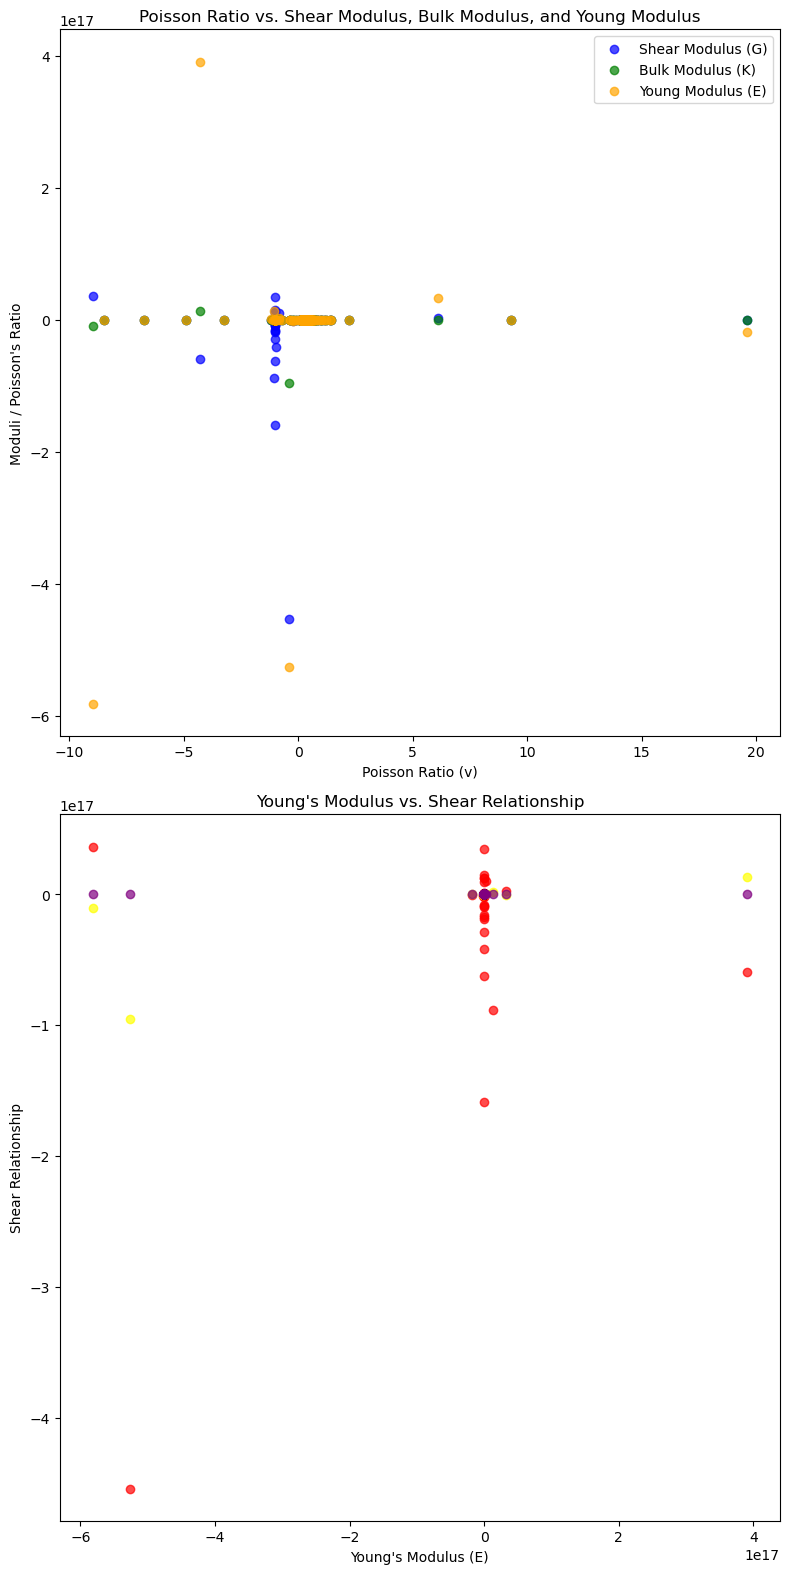

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
import csv
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

# Extract columns correctly, ensuring not to exceed df's length
num_rows = min(2911, len(df))
bulk_modulus_lst = [df.iloc[n, 0] for n in range(num_rows)]
shear_modulus_lst = [df.iloc[n, 1] for n in range(num_rows)]
young_modulus_lst = [df.iloc[n, 2] for n in range(num_rows)]
poisson_ratio_lst = [df.iloc[n, 3] for n in range(num_rows)]
#shear_rela_lst = [df.iloc[n, 5] for n in range(num_rows)]

# Sort data for continuous line plot
#sorted_pairs = sorted(zip(young_modulus_lst, shear_rela_lst))
#young_sorted, shear_rela_sorted = zip(*sorted_pairs)

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(8, 16))  # 3 rows, 1 column

# 1. Combined Scatter Plot
ax[0].scatter(poisson_ratio_lst, shear_modulus_lst, color='blue', alpha=0.7, label="Shear Modulus (G)")
ax[0].scatter(poisson_ratio_lst, bulk_modulus_lst, color='green', alpha=0.7, label="Bulk Modulus (K)")
ax[0].scatter(poisson_ratio_lst, young_modulus_lst, color='orange', alpha=0.7, label="Young Modulus (E)")
ax[0].set_xlabel("Poisson Ratio (v)")
ax[0].set_ylabel("Moduli / Poisson's Ratio")
ax[0].set_title("Poisson Ratio vs. Shear Modulus, Bulk Modulus, and Young Modulus")
ax[0].legend()

# 2. Young’s Modulus vs. Shear Relationship (Sorted Line)

ax[1].scatter(young_modulus_lst, shear_modulus_lst, color='red', alpha=0.7, label="Shear Modulus (G)")
ax[1].scatter(young_modulus_lst, bulk_modulus_lst, color='yellow', alpha=0.7, label="Bulk Modulus (K)")
ax[1].scatter(young_modulus_lst, poisson_ratio_lst, color='purple', alpha=0.7, label="Poisson's Ratio (ν)")
ax[1].set_xlabel("Young's Modulus (E)")
ax[1].set_ylabel("Shear Relationship")
ax[1].set_title("Young's Modulus vs. Shear Relationship")


# 3. Bulk Modulus vs. Shear Relationship
"""
ax[2].scatter(bulk_modulus_lst, shear_rela_lst, color='purple', alpha=0.7)
ax[2].set_xlabel("Bulk Modulus (K)")
ax[2].set_ylabel("Shear Relationship")
ax[2].set_title("Bulk Modulus vs. Shear Relationship")
"""
# Adjust layout
plt.tight_layout()

plt.show()


In [11]:
new_bulk_lst = []
for i in bulk_modulus_lst:
    if 0 <= i <= 1000:
        new_bulk_lst.append(i)

new_shearmod_lst = []
for j in shear_modulus_lst:
    if 0 <= j <= 1000:
        new_shearmod_lst.append(j)



In [12]:
import pandas as pd
import numpy as np

# 1. Prepare the first part of JDP
JDP = [
    formation_energy_lst,
    jarvis_data_lst[6],
    new_bulk_lst,
    new_shearmod_lst,
    young_modulus_lst,
    poisson_ratio_lst,
]

# 2. Create df_1 safely
df_1 = pd.DataFrame({
    'val1': jarvis_data_lst[18],
    'val2': jarvis_data_lst[19],
    'val3': jarvis_data_lst[20]
}).astype(float)

# 3. Create trace_data and CLEAN it before using
trace_data = (df_1['val1'] + df_1['val2'] + df_1['val3'])

# Keep only reasonable values for trace_data
trace_data = trace_data[(trace_data > 2) & (trace_data < 100)]

# 4. Append cleaned trace_data to JDP
JDP.append(list(trace_data))

# 5. Filter Poisson ratio (only 0 < poisson < 0.5)
dummy_lst_poisson = []
for poisson in poisson_ratio_lst:
    if 0 < poisson < 0.5:
        dummy_lst_poisson.append(poisson)

# 6. Rebuild JDP with cleaned Poisson
JDP = [
    formation_energy_lst,
    jarvis_data_lst[6],
    new_bulk_lst,
    new_shearmod_lst,
    young_modulus_lst,
    dummy_lst_poisson,
]

# 7. Append the cleaned trace_data again
JDP.append(list(trace_data))

# 8. Filter dielectric (already cleaned above, but double-check)
dummy_lst_dielectric = []
for trace in trace_data:
    if 2 < trace < 100:
        dummy_lst_dielectric.append(trace)

# 9. Rebuild JDP again, now clean
JDP = [
    formation_energy_lst,
    jarvis_data_lst[6],
    new_bulk_lst,
    new_shearmod_lst,
    young_modulus_lst,
    dummy_lst_poisson,
    dummy_lst_dielectric,
]

# 10. Filter bandgap (0 < gap < 10)
dummy_lst_band = []
for gap in jarvis_data_lst[6]:
    if 0 < gap < 10:
        dummy_lst_band.append(gap)

# 11. Rebuild JDP with clean bandgap
JDP = [
    formation_energy_lst,
    dummy_lst_band,
    new_bulk_lst,
    new_shearmod_lst,
    young_modulus_lst,
    dummy_lst_poisson,
    dummy_lst_dielectric,
]

# Quick sanity‐check of the raw list
print("Type:", type(formation_energy_lst))
print("Length:", len(formation_energy_lst))
print("First 10 entries:", formation_energy_lst[:60])

# If it’s numeric, let’s get basic stats
import numpy as np
arr = np.array(formation_energy_lst, dtype=float)
print(f"min={arr.min():.3f}, max={arr.max():.3f}, mean={arr.mean():.3f}, std={arr.std():.3f}")


# 12. Filter formation energy (should be negative)
dummy_lst_energy = []
for energy in formation_energy_lst:
    print(type(energy))
    if energy < 0:
        dummy_lst_energy.append(energy)


# 13. FINAL JDP
JDP = [
    dummy_lst_energy,
    dummy_lst_band,
    new_bulk_lst,
    new_shearmod_lst,
    young_modulus_lst,
    dummy_lst_poisson,
    dummy_lst_dielectric,
]

# 14. (Optional) Print some checks
print(JDP)


Type: <class 'list'>
Length: 1683
First 10 entries: [np.float64(-0.00249), np.float64(-0.00527), np.float64(-6e-05), np.float64(-0.00475), np.float64(-0.0003), np.float64(-0.00031), np.float64(-0.00315), np.float64(-0.01485), np.float64(-0.0155), np.float64(-0.01574), np.float64(-0.01471), np.float64(-0.01738), np.float64(-0.01472), np.float64(-0.01178), np.float64(-0.0406), np.float64(-0.04228), np.float64(-0.05383), np.float64(-0.09799), np.float64(-1.38422), np.float64(-1.24634), np.float64(-1.38441), np.float64(-1.3844), np.float64(-1.38442), np.float64(-1.38443), np.float64(-1.38201), np.float64(-1.19665), np.float64(-1.38447), np.float64(-1.38442), np.float64(-1.19661), np.float64(-1.38464), np.float64(-1.37181), np.float64(-1.38422), np.float64(-0.87268), np.float64(-1.11459), np.float64(-1.11164), np.float64(-1.22688), np.float64(-1.19665), np.float64(-1.04236), np.float64(-1.24634), np.float64(-1.33774), np.float64(-1.11459), np.float64(-0.58069), np.float64(-1.31808), np.floa

In [13]:
#Only for the Shear relationship calculation
"""
new_shear_lst = []
for i in shear_rela_lst:
    try:
        new_shear_lst.append(float(i))  # Convert valid numbers
    except ValueError:
        continue  # Skip invalid values like '#DIV/0!'

while len(new_shear_lst) < len(X):
    new_shear_lst.append(0)  # Append zeros to match X

X = np.column_stack((X, new_shear_lst))
print(X[:,3])
"""


"\nnew_shear_lst = []\nfor i in shear_rela_lst:\n    try:\n        new_shear_lst.append(float(i))  # Convert valid numbers\n    except ValueError:\n        continue  # Skip invalid values like '#DIV/0!'\n\nwhile len(new_shear_lst) < len(X):\n    new_shear_lst.append(0)  # Append zeros to match X\n\nX = np.column_stack((X, new_shear_lst))\nprint(X[:,3])\n"

In [14]:
import numpy as np
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, n_clusters, max_iters=100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
    
    def fit(self, X):
        # Initialize centroids randomly
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        for _ in range(self.max_iters):
            labels = self._assign_labels(X)
            new_centroids = self._update_centroids(X, labels)
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids
    
    def _assign_labels(self, X):
        # Calculate the distance from each point to every centroid
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)
    
    def _update_centroids(self, X, labels):
        # Update centroids by taking the mean of points in each cluster
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
        return new_centroids



In [15]:
import numpy as np

length_lst = [len(col) for col in JDP]

# Find the minimum length across columns
min_len = min(length_lst)

clean_data = []
for j in range(min_len):
    try:
        row = [
            float(JDP[0][j]),
            float(JDP[1][j]),
            float(JDP[2][j]),
            float(JDP[3][j]),
            float(JDP[4][j]),
            float(JDP[5][j]),
            float(JDP[6][j]),
        ]
        clean_data.append(row)
    except (ValueError, IndexError, KeyError):
        continue

min_len = min(len(col) for col in JDP)

clean_data = []
for j in range(min_len):
    try:
        row = [float(JDP[i][j]) for i in range(len(JDP))]
        if all(val >= 0 for val in row[1:]):  # keep negative values in index 0, but filter out rows with negatives elsewhere
            clean_data.append(row)
    except (ValueError, IndexError, KeyError):
        continue

X = np.array(clean_data)


#I am checking for negative numbers
neg_lst = 0
for lst in X:
    for i in lst:
        if i < 0:
            neg_lst += 1

        
print(JDP)

[[np.float64(-0.00249), np.float64(-0.00527), np.float64(-6e-05), np.float64(-0.00475), np.float64(-0.0003), np.float64(-0.00031), np.float64(-0.00315), np.float64(-0.01485), np.float64(-0.0155), np.float64(-0.01574), np.float64(-0.01471), np.float64(-0.01738), np.float64(-0.01472), np.float64(-0.01178), np.float64(-0.0406), np.float64(-0.04228), np.float64(-0.05383), np.float64(-0.09799), np.float64(-1.38422), np.float64(-1.24634), np.float64(-1.38441), np.float64(-1.3844), np.float64(-1.38442), np.float64(-1.38443), np.float64(-1.38201), np.float64(-1.19665), np.float64(-1.38447), np.float64(-1.38442), np.float64(-1.19661), np.float64(-1.38464), np.float64(-1.37181), np.float64(-1.38422), np.float64(-0.87268), np.float64(-1.11459), np.float64(-1.11164), np.float64(-1.22688), np.float64(-1.19665), np.float64(-1.04236), np.float64(-1.24634), np.float64(-1.33774), np.float64(-1.11459), np.float64(-0.58069), np.float64(-1.31808), np.float64(-1.31808), np.float64(-1.38199), np.float64(-0.

C:\Users\monia\miniconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\monia\miniconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\monia\miniconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monia\miniconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\monia\miniconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.Crea

IndexError: list index out of range

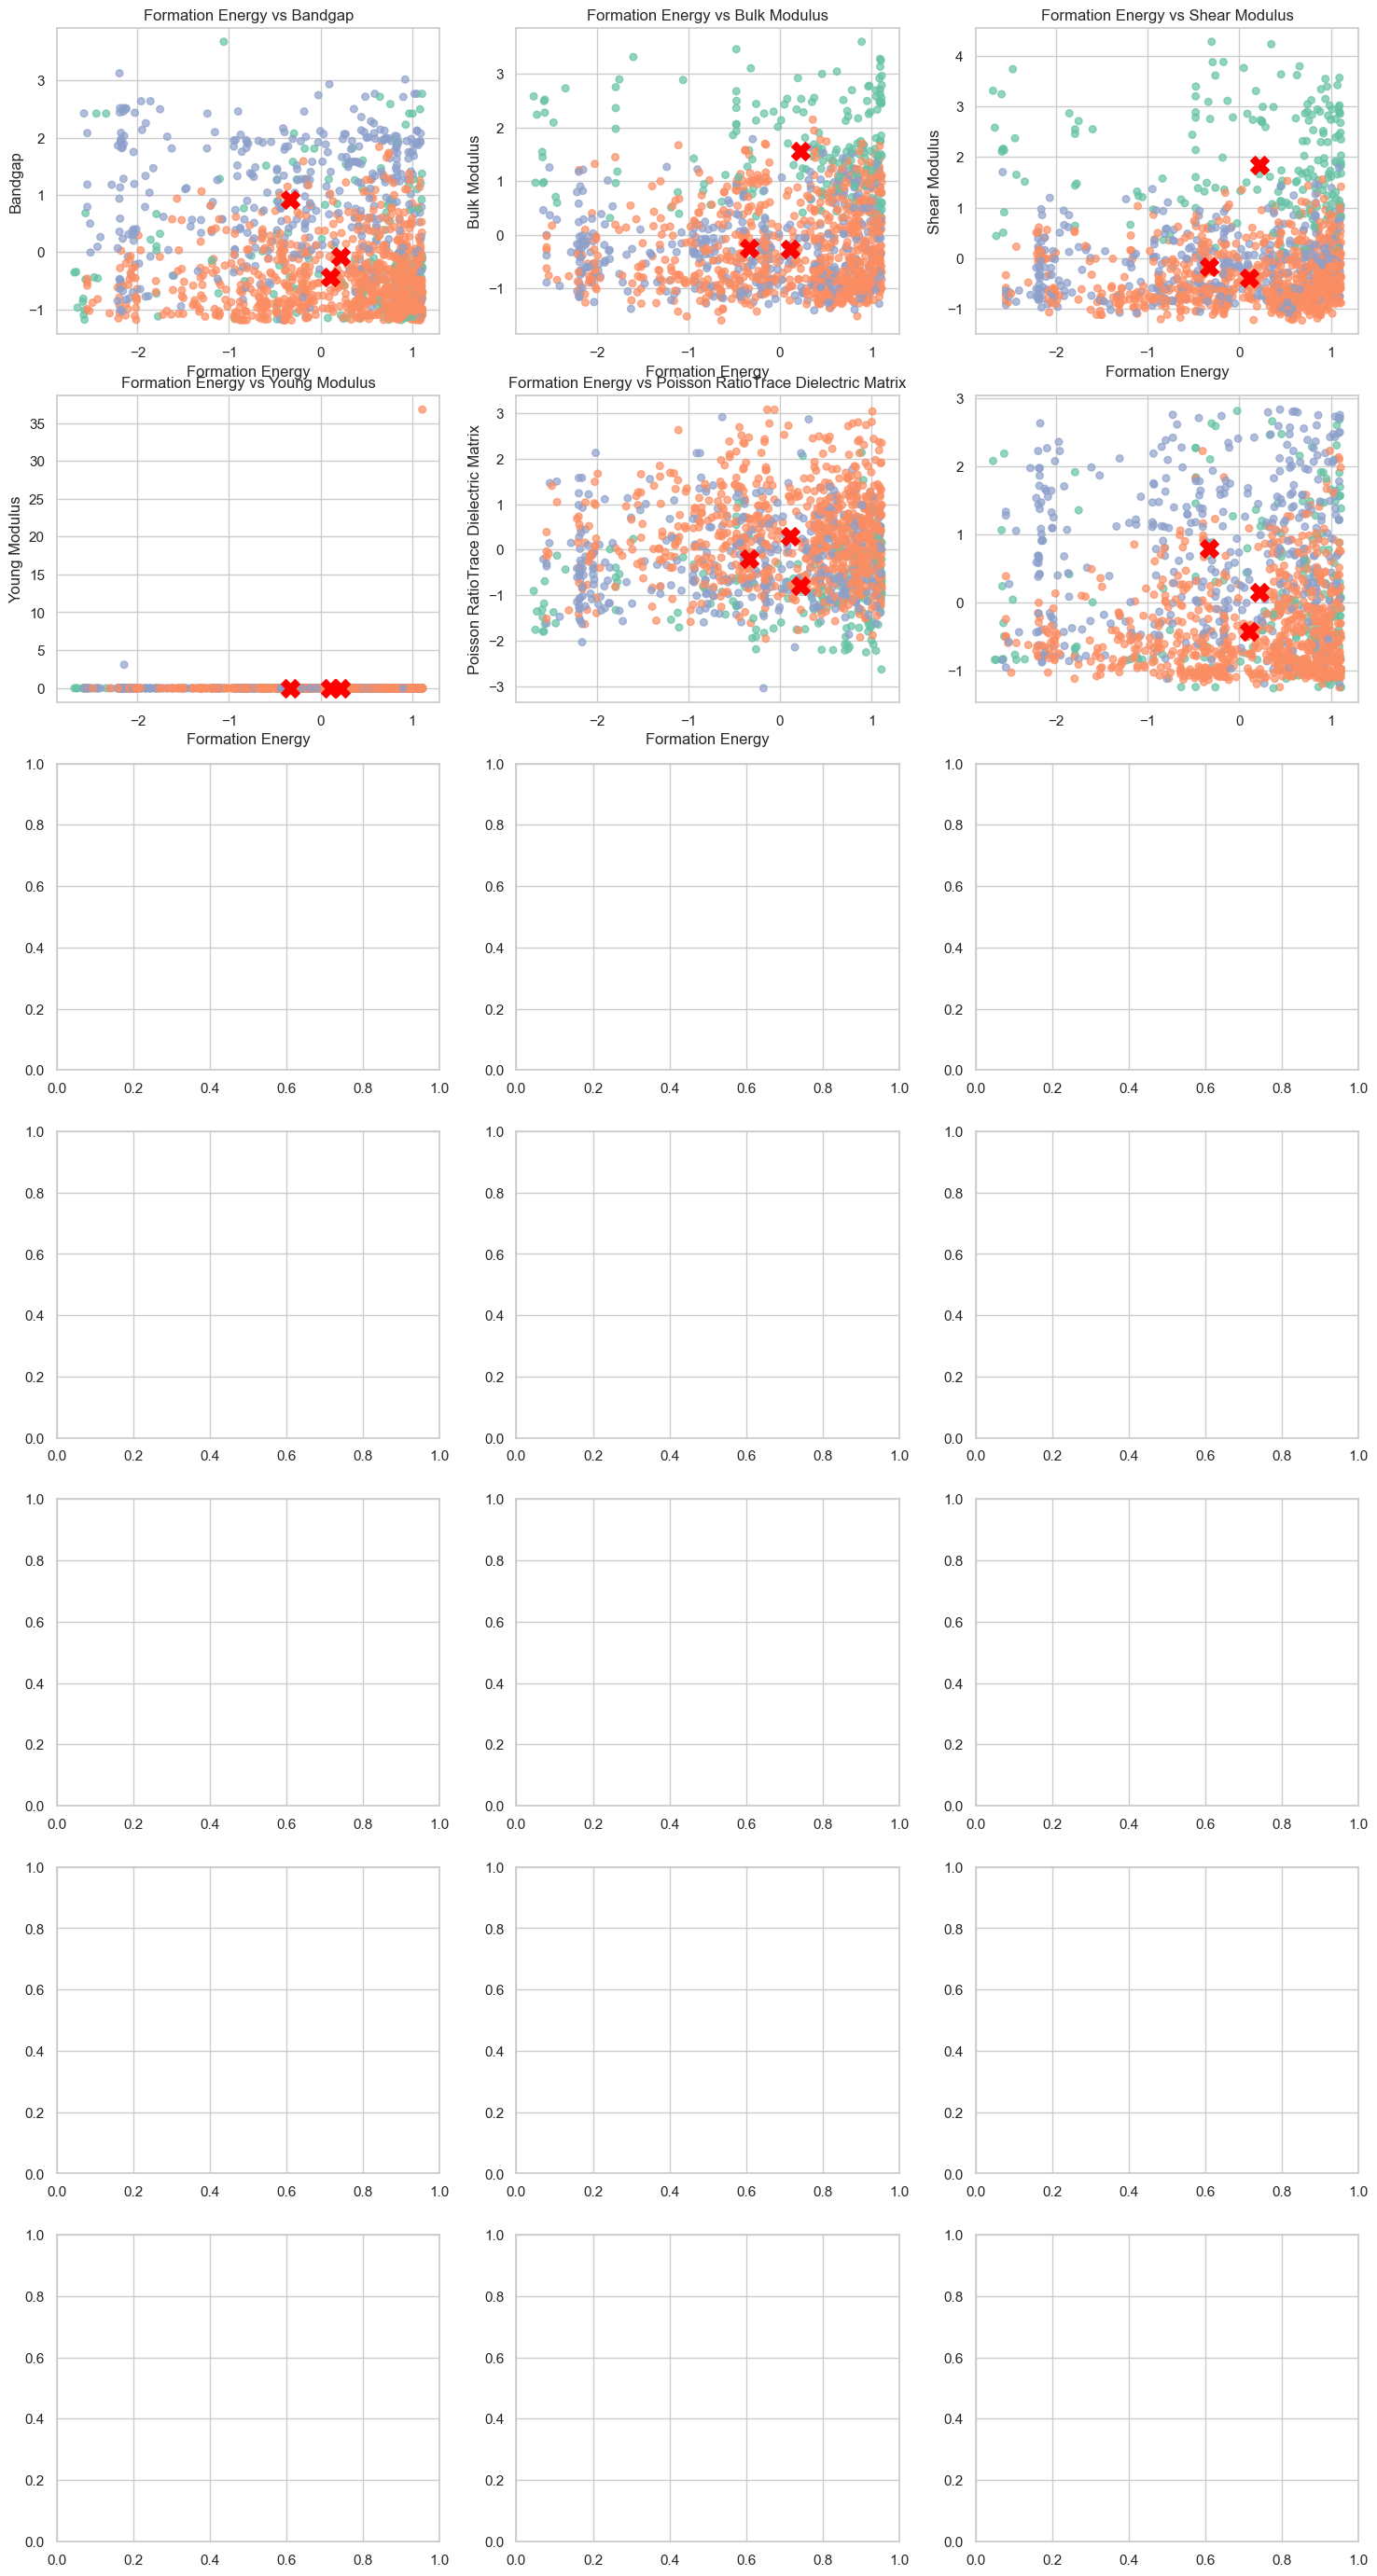

In [16]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
from itertools import combinations
from matplotlib.colors import ListedColormap
import os
OMP_NUM_THREADS=1


# --- 1. Scale Features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 2. Fit KMeans ---
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Encode labels
labels = LabelEncoder().fit_transform(kmeans.labels_)
centroids = kmeans.cluster_centers_

# --- 3. Set Up for Plotting ---
sns.set(style="whitegrid")
n_features = X.shape[1]
feature_names = [
    "Formation Energy",
    "Bandgap",
    "Bulk Modulus",
    "Shear Modulus",
    "Young Modulus",
    "Poisson Ratio"
    "Trace Dielectric Matrix"
][:n_features]

feature_pairs = list(combinations(range(n_features), 2))
palette = sns.color_palette("Set2", np.unique(labels).size)
cluster_cmap = ListedColormap(palette.as_hex())

# --- 4. Pairwise Feature Plots ---
n_cols = 3
n_rows = int(np.ceil(len(feature_pairs) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))
axes = axes.flatten()

for i, (x_idx, y_idx) in enumerate(feature_pairs):
    axes[i].scatter(X_scaled[:, x_idx], X_scaled[:, y_idx], c=labels, cmap=cluster_cmap, alpha=0.7, s=30)
    axes[i].scatter(centroids[:, x_idx], centroids[:, y_idx], c='red', marker='X', s=200)
    axes[i].set_title(f"{feature_names[x_idx]} vs {feature_names[y_idx]}")
    axes[i].set_xlabel(feature_names[x_idx])
    axes[i].set_ylabel(feature_names[y_idx])

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='Data points',
               markerfacecolor=palette[0], markersize=10),
    plt.Line2D([0], [0], marker='X', color='w', label='Centroids',
               markerfacecolor='red', markersize=10)
]
fig.legend(handles=handles, loc='upper center', ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# --- 5. PCA Visualization ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroids_pca = pca.transform(centroids)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap=cluster_cmap, alpha=0.7)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label="Centroids")
plt.title("PCA Projection of Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

In [ ]:
print(X.shape)
print(X_scaled.shape)
print(len(X[0]))
